In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8, 5)

# Generate a time series data with four variables values less than 10 and representing 9 steps.



In [ ]:
import numpy as np
np.random.randint(0, 10, (9, 4))

array([[7, 4, 9, 8],
       [8, 4, 9, 7],
       [0, 9, 8, 1],
       [7, 3, 8, 0],
       [0, 3, 9, 0],
       [1, 7, 1, 2],
       [5, 9, 9, 4],
       [8, 5, 0, 7],
       [6, 5, 9, 6]])

# Time series plot and decomposition

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose, STL

In [ ]:
df = pd.read_csv('/content/Decomposition.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
df

In [ ]:
fig, ax = plt.subplots()

ax.plot(df.date, df.data)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
advanced_decomposition = STL(df.data, period=4).fit()

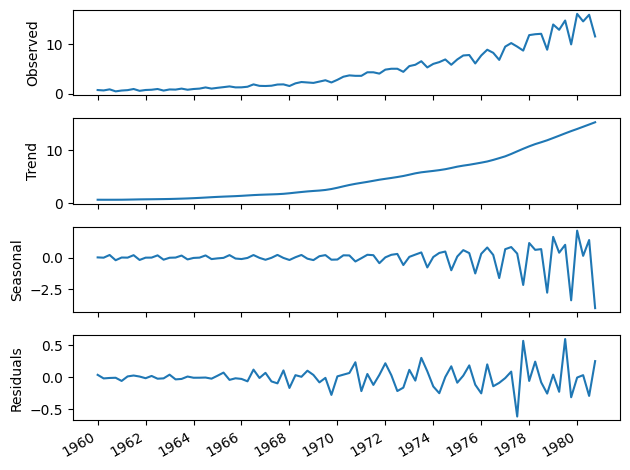

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')


plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.observed)
ax.set_ylabel('Observed')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.trend)
ax.set_ylabel('Trend')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.seasonal)
ax.set_ylabel('Seasonal')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.resid)
ax.set_ylabel('Residuals')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
fig, ax = plt.subplots()

ax.plot(df.date, df.data)
ax.plot(advanced_decomposition.trend, color='lightgrey', linestyle='--', label='Trend')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

# Transformations in Time Series

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Power Transformation
fig, axes = plt.subplots(1, 2,
                        figsize=(10, 5))

X = np.arange(1, 100) ** 2
axes[0].plot(X)
axes[0].set_title("The original shape");

X = X ** (1/2)
axes[1].plot(X)
axes[1].set_title("The transformed shape");

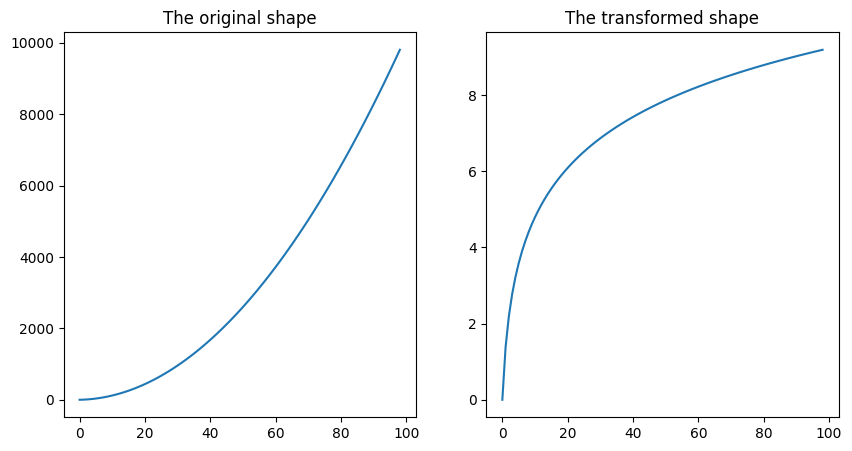

In [ ]:
# Log Transformation
fig, axes = plt.subplots(1, 2,
                        figsize=(10, 5))

X = np.arange(1, 100) ** 2
axes[0].plot(X)
axes[0].set_title("The original shape");

X = np.log(X)
axes[1].plot(X)
axes[1].set_title("The transformed shape");

<ipython-input-13-bd9a064ad068>:10: RuntimeWarning: invalid value encountered in log
  X = np.log(X)


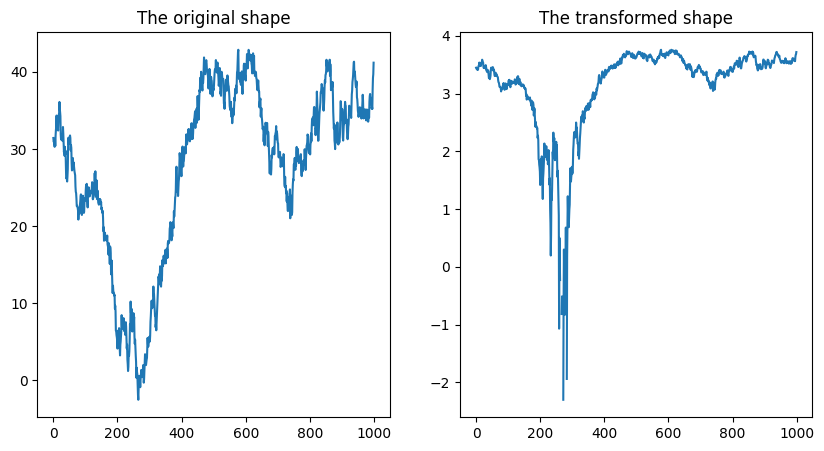

In [ ]:
fig, axes = plt.subplots(1, 2,
                        figsize=(10, 5))

X = np.random.randn(1000)
X = np.cumsum(X)
X = X + 30 # added 30 to make all data positive
axes[0].plot(X)
axes[0].set_title("The original shape");

X = np.log(X)
axes[1].plot(X)
axes[1].set_title("The transformed shape");

In [ ]:
## Box-cox transformation
from scipy.stats import boxcox

In [ ]:
df = pd.read_csv("/content/airline_passengers.csv")
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.Month = pd.to_datetime(df["Month"], format="%Y-%m")
df = df.set_index(df["Month"])

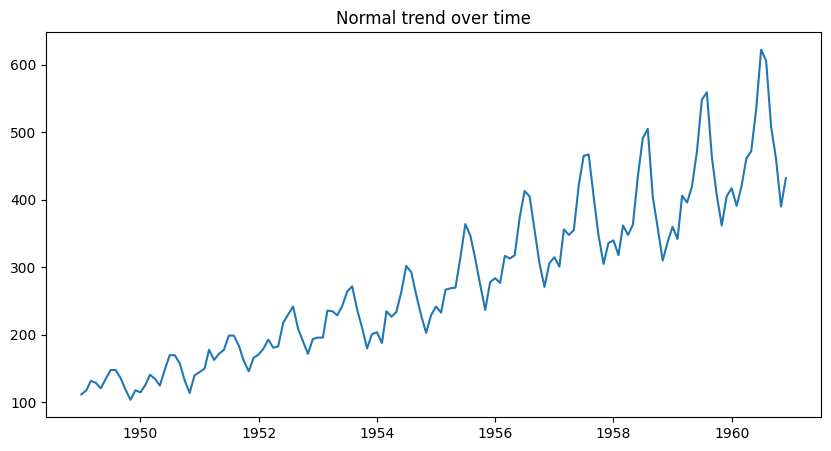

In [ ]:
plt.rcParams["figure.figsize"] = 10, 5
plt.plot(df["Passengers"])
plt.title("Normal trend over time");

In [ ]:
df["log"] = np.log(df.Passengers)
df["sqrt"] = np.sqrt(df.Passengers)
boxed, lambda_ = boxcox(df.Passengers)
df["boxcox"] = boxed

In [ ]:
lambda_

0.14802265137037945

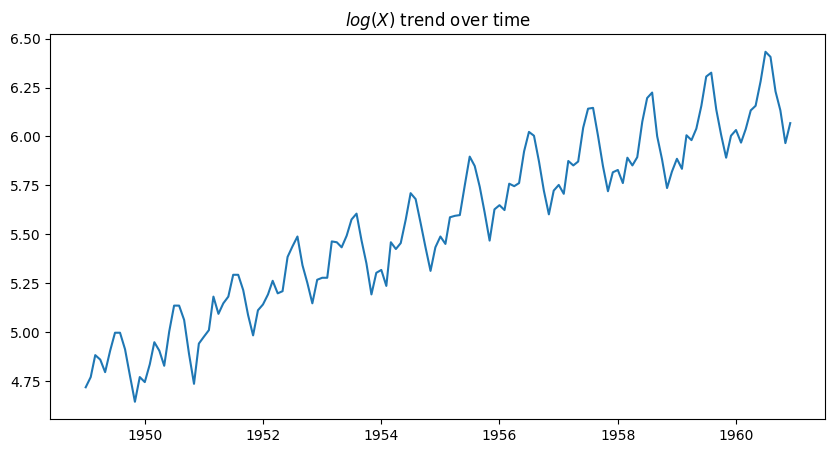

In [ ]:
# Log
plt.plot(df["log"])
plt.title("$log(X)$ trend over time");

It is more even on the both sides? like, the magnitude is not changing much as it did in the normal data.

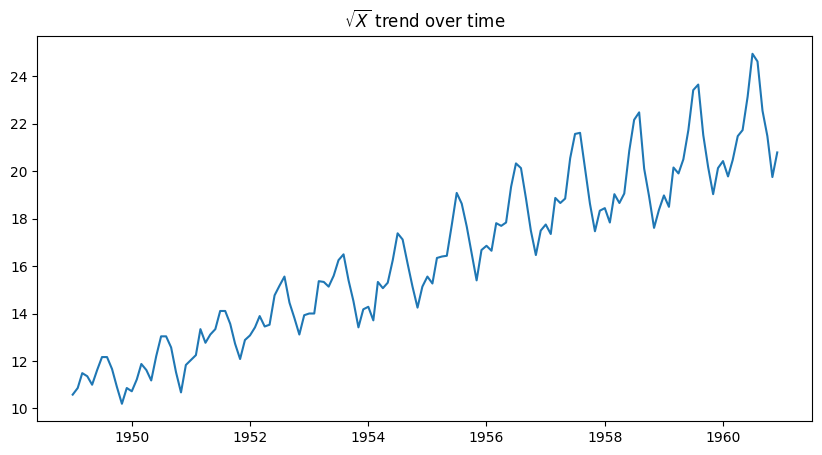

In [ ]:
# Sqrt
plt.plot(df["sqrt"])
plt.title("$\sqrt{X}$ trend over time");

It still has some increase in the magnitude but not much as the original data.

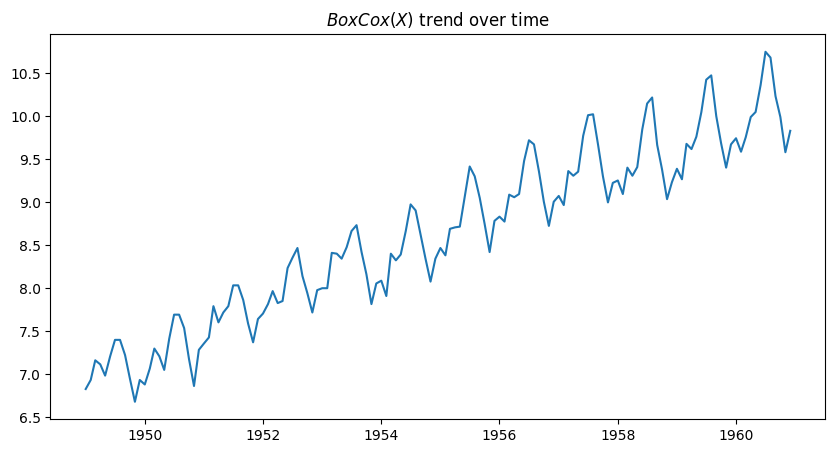

In [ ]:
# Box-cox
plt.plot(df["boxcox"])
plt.title("$BoxCox(X)$ trend over time");

It is similart to the log. So, here log and boxcox work similar (kind of)

In [ ]:
#Confimation the Boxcox works in the if 0 else logic
#Since the lambda is ~0.14 it will use the formulae
# The calculated valuee
df["boxcox"].head()

Month
1949-01-01    6.827490
1949-02-01    6.932822
1949-03-01    7.161892
1949-04-01    7.114611
1949-05-01    6.983787
Name: boxcox, dtype: float64

In [ ]:
# Manual values
(((df["Passengers"] ** lambda_) - 1) / lambda_).head()

Month
1949-01-01    6.827490
1949-02-01    6.932822
1949-03-01    7.161892
1949-04-01    7.114611
1949-05-01    6.983787
Name: Passengers, dtype: float64

# Price simulation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# number of time steps
T = 1000

# initial price
P0 = 10

# drift
mu = 0.001

In [ ]:
# last log price
last_p = np.log(P0)

log_returns = np.zeros(T)
prices = np.zeros(T)
for t in range(T):
  # sample a log return
  r = 0.01 * np.random.randn()

  # compute the new log price
  p = last_p + mu + r   ## Random walk

  # store the return and price
  log_returns[t] = r + mu
  prices[t] = np.exp(p)

  # assign last_p
  last_p = p

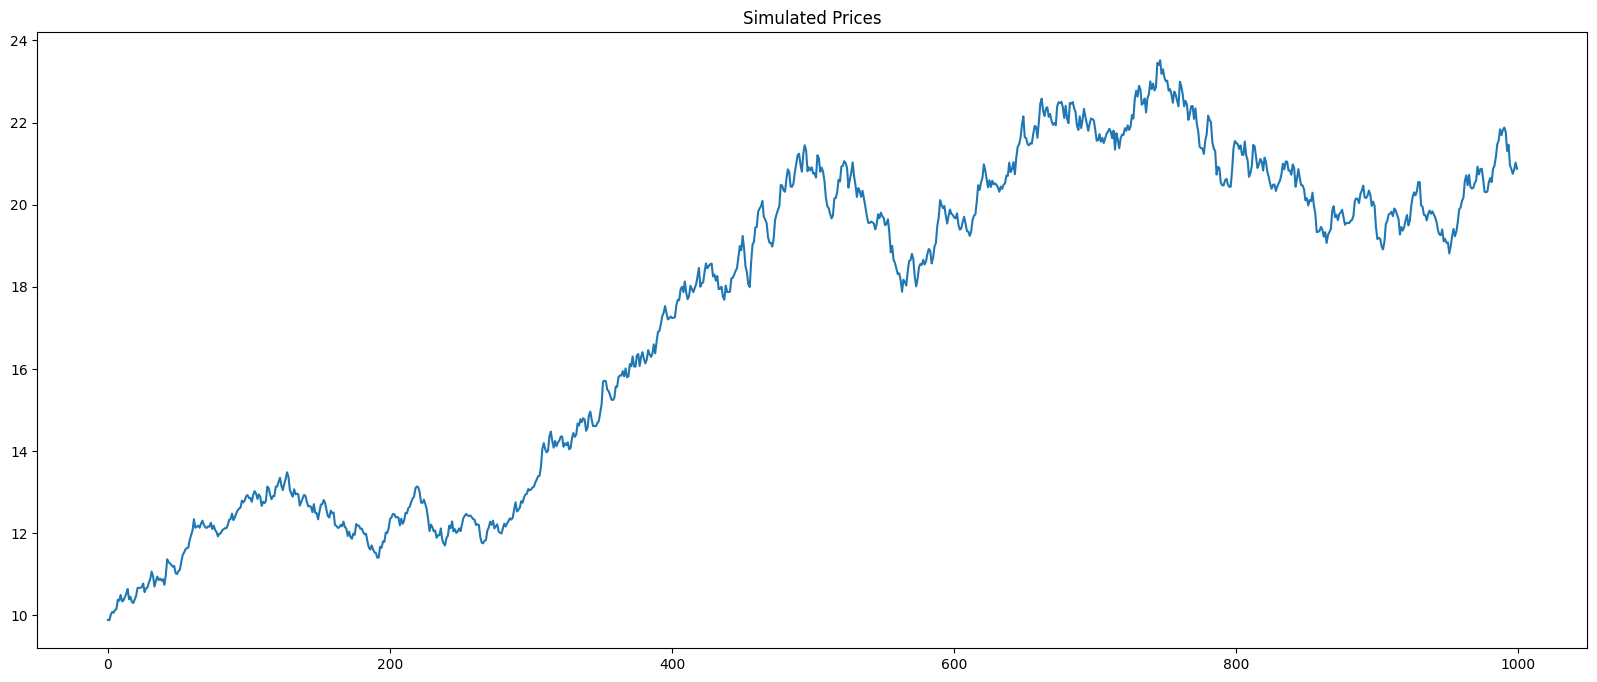

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(prices)
plt.title("Simulated Prices");

## Exercise: Check your results by changing the drift term and plot them

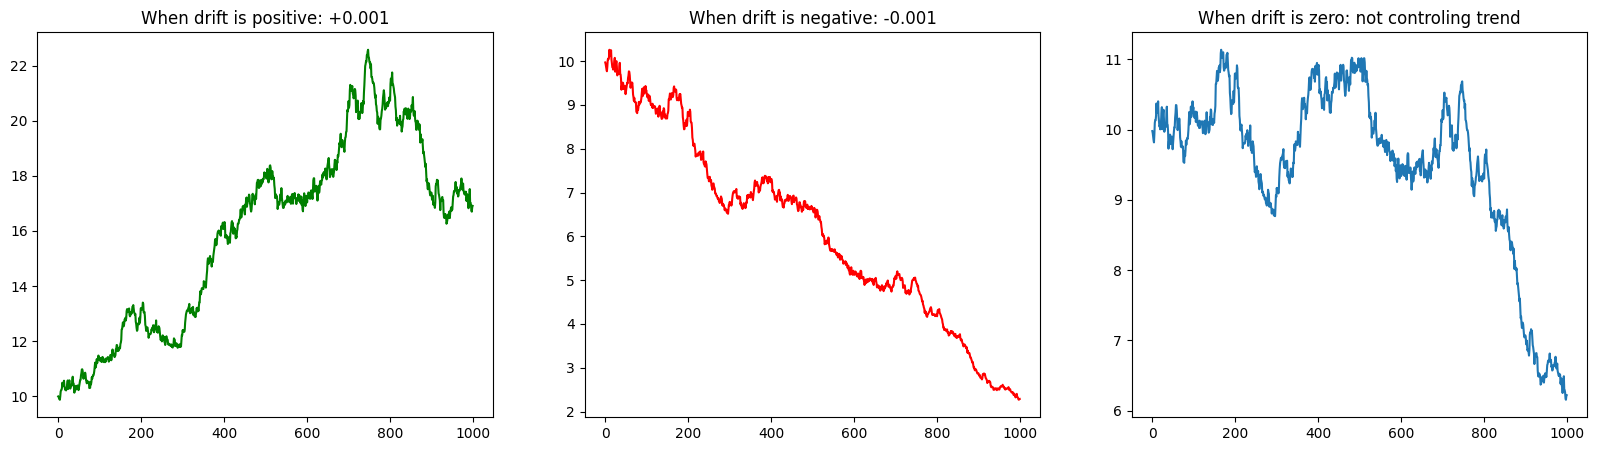

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def get_prices(mu):
    T = 1000
    price = 10
    log_price = np.log(price)
    prices = np.zeros(T)
    log_return = np.zeros(T)
    state = np.random.RandomState(121)

    for t in range(T):
        returns = 0.01 * state.randn()
        new_price = log_price + mu + returns
        log_return[t] = returns + mu
        prices[t] = np.exp(new_price)
        log_price = new_price
    return prices

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
axes[0].plot(get_prices(mu=0.001), 'g')
axes[0].set_title("When drift is positive: +0.001")
axes[1].plot(get_prices(mu=-0.001), 'r')
axes[1].set_title("When drift is negative: -0.001");
axes[2].plot(get_prices(mu=0))
axes[2].set_title("When drift is zero: not controling trend");

# Naive Forecasting Methods

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/Decomposition.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [ ]:
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


## Plot data with train/test split

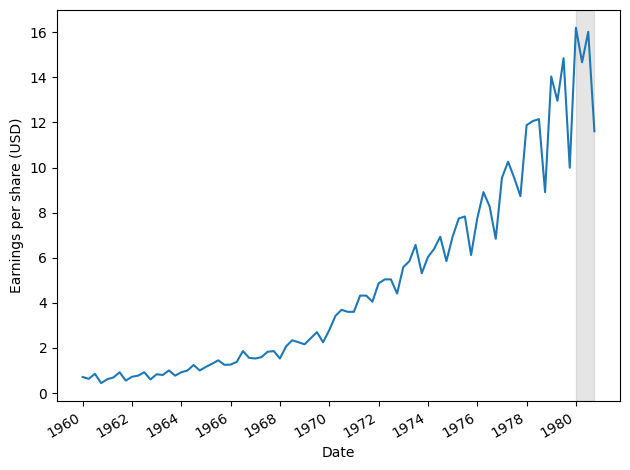

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['date'], df['data'])
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

In [ ]:
train = df[:-4]
test = df[-4:]

## Predict historical mean

In [ ]:
historical_mean = np.mean(train['data'])
historical_mean

4.308499987499999

In [ ]:
test.loc[:, 'pred_mean'] = historical_mean

test

<ipython-input-22-335dd48d1b92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_mean'] = historical_mean


,date,data,pred_mean
80,1980-01-01,16.20,4.3085
81,1980-04-01,14.67,4.3085
82,1980-07-02,16.02,4.3085
83,1980-10-01,11.61,4.3085


In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape_hist_mean = mape(test['data'], test['pred_mean'])
mape_hist_mean

70.00752579965119

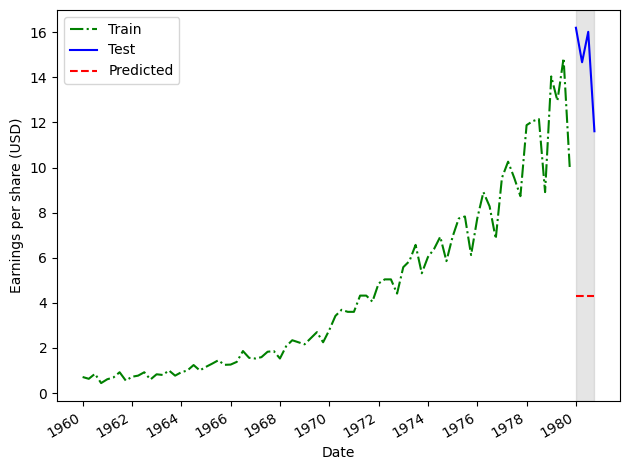

In [ ]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

## Predict last year mean

In [ ]:
last_year_mean = np.mean(train['data'][-4:])
last_year_mean

12.96

In [ ]:
test.loc[:, 'pred__last_yr_mean'] = last_year_mean

test

<ipython-input-27-5532e2ab05ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred__last_yr_mean'] = last_year_mean


,date,data,pred_mean,pred__last_yr_mean
80,1980-01-01,16.20,4.3085,12.96
81,1980-04-01,14.67,4.3085,12.96
82,1980-07-02,16.02,4.3085,12.96
83,1980-10-01,11.61,4.3085,12.96


In [ ]:
mape_last_year_mean = mape(test['data'], test['pred__last_yr_mean'])
mape_last_year_mean

15.5963680725103

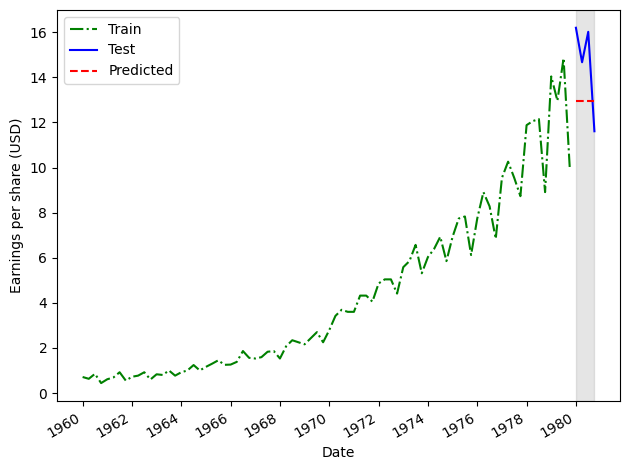

In [ ]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred__last_yr_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

## Predict last know value

In [ ]:
last = train['data'].iloc[-1]
last

9.99

In [ ]:
test.loc[:, 'pred_last'] = last

test

<ipython-input-31-3a426c9dce84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last'] = last


,date,data,pred_mean,pred__last_yr_mean,pred_last
80,1980-01-01,16.20,4.3085,12.96,9.99
81,1980-04-01,14.67,4.3085,12.96,9.99
82,1980-07-02,16.02,4.3085,12.96,9.99
83,1980-10-01,11.61,4.3085,12.96,9.99


In [ ]:
mape_last = mape(test['data'], test['pred_last'])
mape_last

30.457277908606535

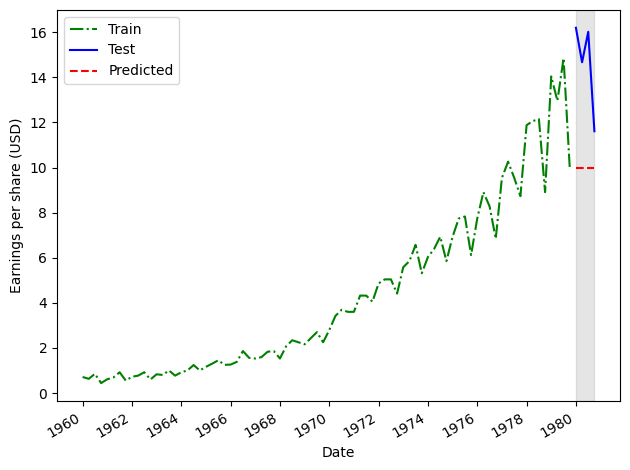

In [ ]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

## Naive seasonal forecast

In [ ]:
test.loc[:, 'pred_last_season'] = train['data'][-4:].values

test

<ipython-input-34-647c89508790>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last_season'] = train['data'][-4:].values


,date,data,pred_mean,pred__last_yr_mean,pred_last,pred_last_season
80,1980-01-01,16.20,4.3085,12.96,9.99,14.04
81,1980-04-01,14.67,4.3085,12.96,9.99,12.96
82,1980-07-02,16.02,4.3085,12.96,9.99,14.85
83,1980-10-01,11.61,4.3085,12.96,9.99,9.99


In [ ]:
mape_naive_seasonal = mape(test['data'], test['pred_last_season'])
mape_naive_seasonal

11.561658552433654

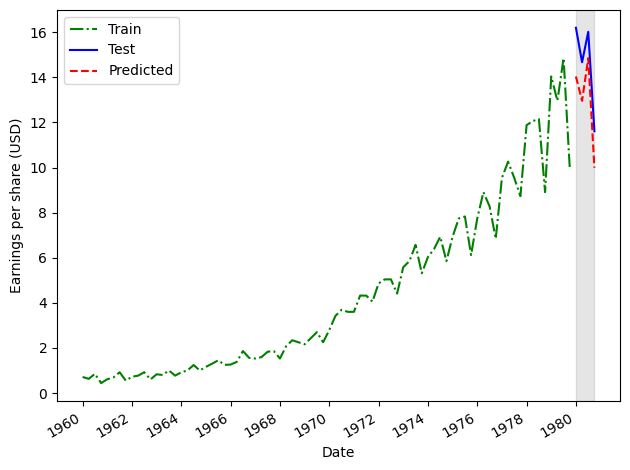

In [ ]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last_season'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

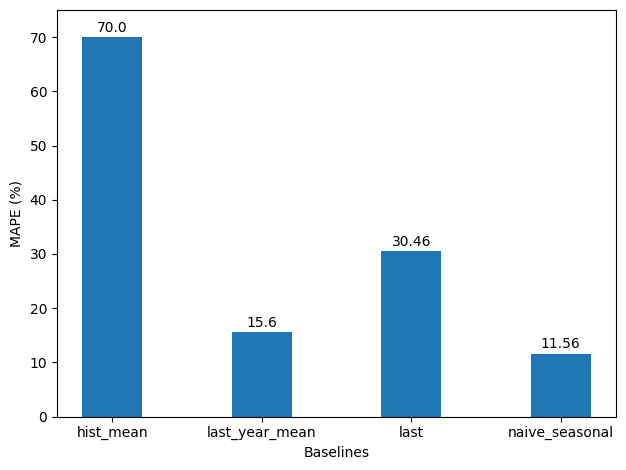

In [ ]:
fig, ax = plt.subplots()

x = ['hist_mean', 'last_year_mean', 'last', 'naive_seasonal']
y = [70.00, 15.60, 30.46, 11.56]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()

## Exercise

Forecast the close price of SPY data using the naive methods and compute the corresponding MAPE values. Also check RMSE and MAE values.

# Stationarity of Time Series

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/AMZN.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-05,160.225006,163.036499,160.123001,161.050003,161.050003,65384000
1,2021-10-06,160.676498,163.216995,159.931000,163.100494,163.100494,50660000
2,2021-10-07,164.576996,166.287506,164.153000,165.121506,165.121506,48182000
3,2021-10-08,165.850006,166.071503,164.410004,164.431000,164.431000,39964000
4,2021-10-11,163.750000,164.629501,161.904999,162.315002,162.315002,40684000


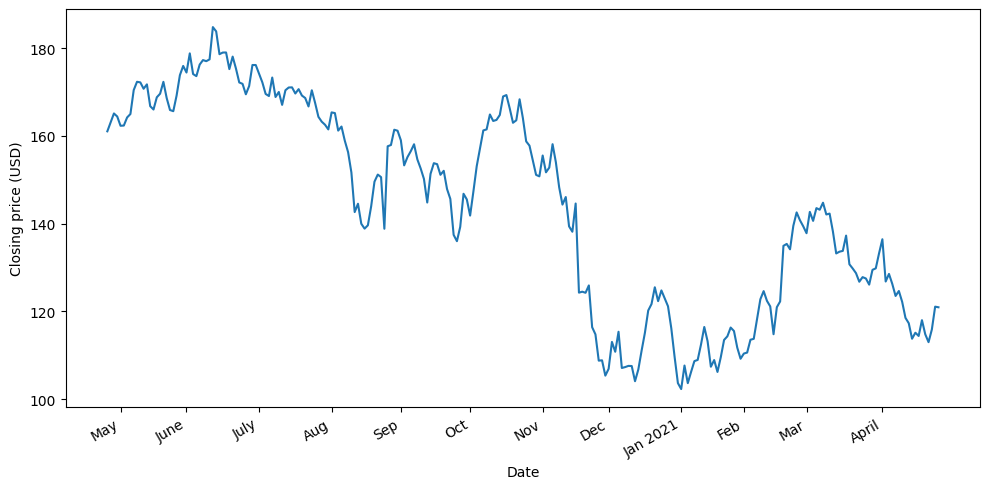

In [ ]:
fig, ax = plt.subplots()

ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235],
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2021', 'Feb', 'Mar', 'April'])

fig.autofmt_xdate()
plt.tight_layout()

## The random walk process

In [ ]:
np.random.seed(42)

steps = np.random.standard_normal(1000)
steps[0]=0

random_walk = np.cumsum(steps)

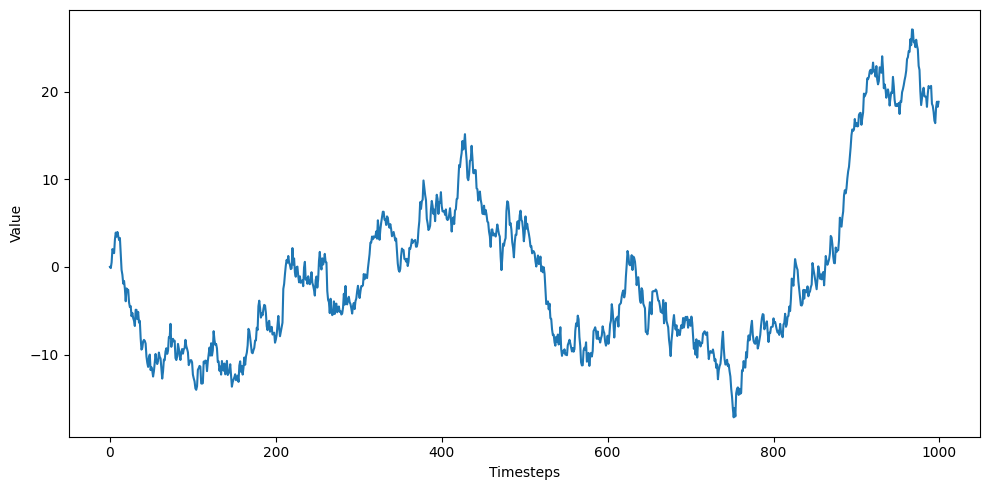

In [ ]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

### Testing for stationarity

In [ ]:
def simulate_process(is_stationary: bool) -> np.array:
    np.random.seed(42)
    process = np.empty(400)

    if is_stationary:
        alpha = 0.5
        process[0] = 0
    else:
        alpha = 1
        process[0] = 10

    for i in range(400):
        if i+1 < 400:
            process[i+1] = alpha*process[i] + np.random.standard_normal()
        else:
            break

    return process

In [ ]:
stationary = simulate_process(True)
non_stationary = simulate_process(False)

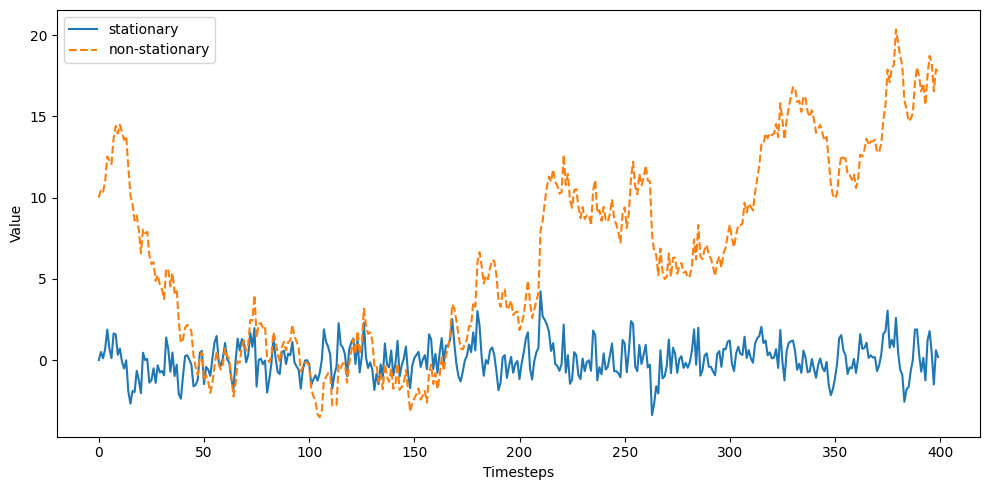

In [ ]:
fig, ax = plt.subplots()

ax.plot(stationary, linestyle='-', label='stationary')
ax.plot(non_stationary, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.legend(loc=2)

plt.tight_layout()

In [ ]:
def mean_over_time(process: np.array) -> np.array:
    mean_func = []

    for i in range(len(process)):
        mean_func.append(np.mean(process[:i]))

    return mean_func

In [ ]:
stationary_mean = mean_over_time(stationary)
non_stationary_mean = mean_over_time(non_stationary)

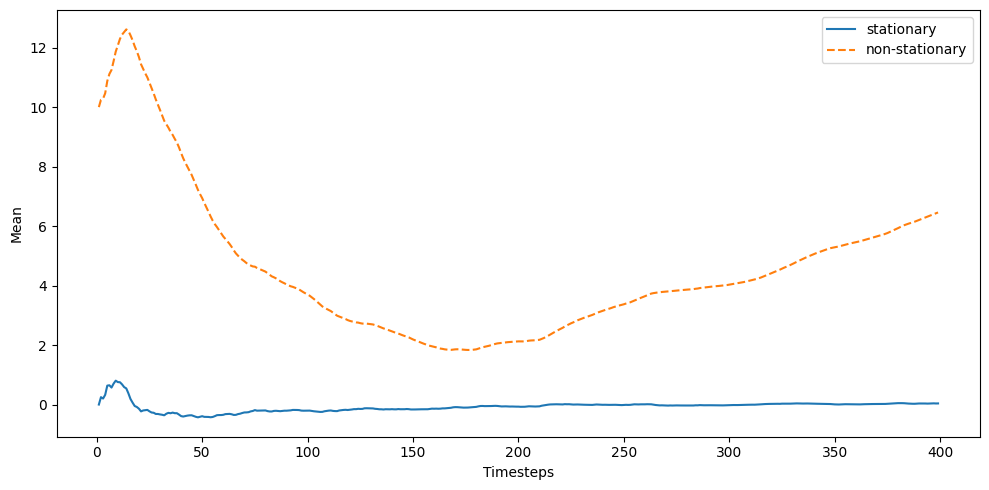

In [ ]:
fig, ax = plt.subplots()

ax.plot(stationary_mean, label='stationary')
ax.plot(non_stationary_mean, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Mean')
ax.legend(loc=1)

plt.tight_layout()

In [ ]:
def var_over_time(process: np.array) -> np.array:
    var_func = []

    for i in range(len(process)):
        var_func.append(np.var(process[:i]))

    return var_func

In [ ]:
stationary_var = var_over_time(stationary)
non_stationary_var = var_over_time(non_stationary)

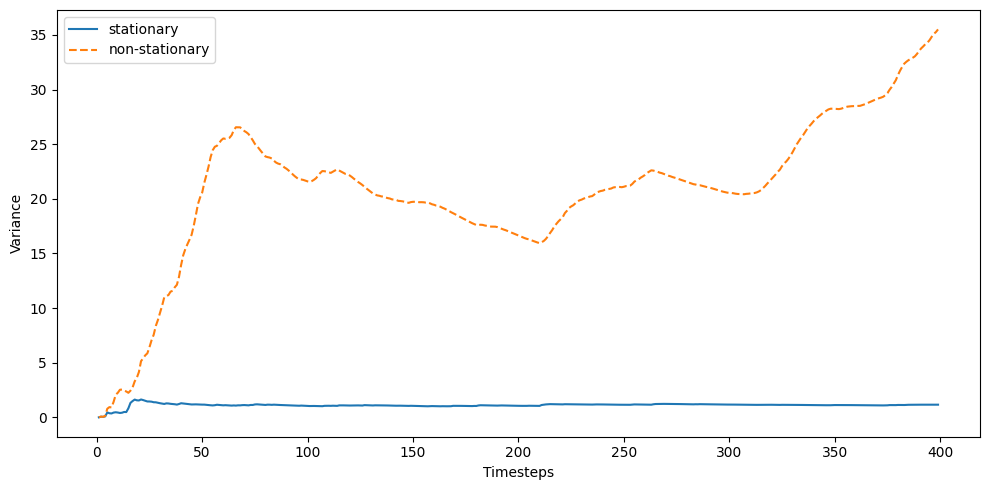

In [ ]:
fig, ax = plt.subplots()

ax.plot(stationary_var, label='stationary')
ax.plot(non_stationary_var, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Variance')
ax.legend(loc=2)

plt.tight_layout()

### Putting it all together

In [ ]:
ADF_result = adfuller(random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.965952487691875
p-value: 0.7654789696692581


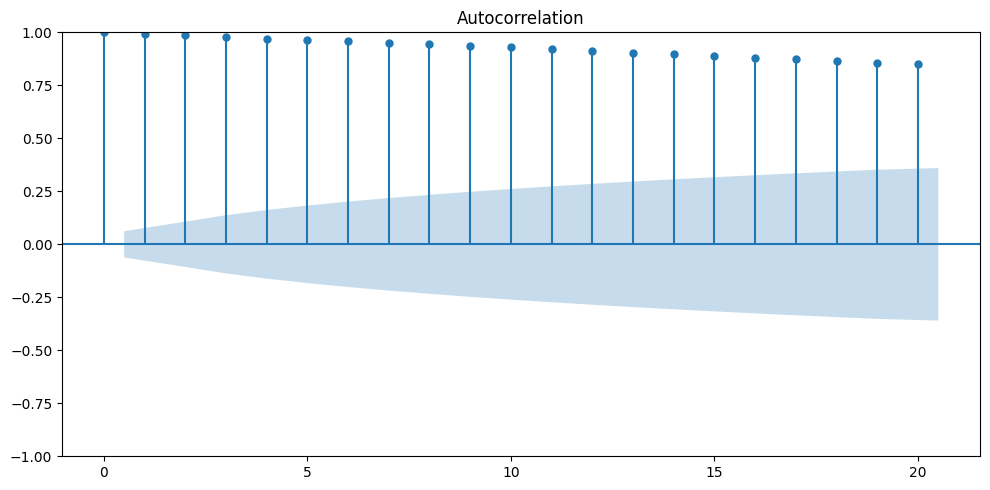

In [ ]:
plot_acf(random_walk, lags=20);

plt.tight_layout()

In [ ]:
diff_random_walk = np.diff(random_walk, n=1)

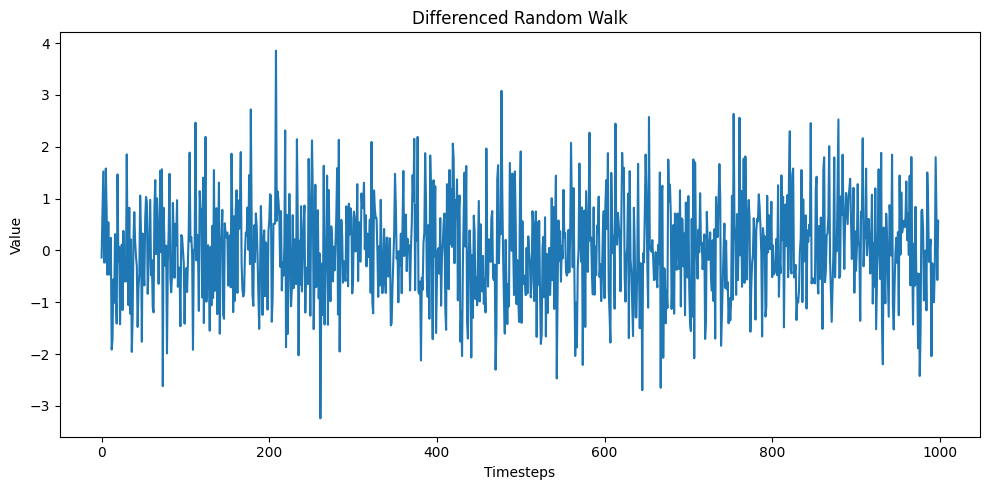

In [ ]:
plt.plot(diff_random_walk)
plt.title('Differenced Random Walk')
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.tight_layout()

In [ ]:
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -31.789310857560594
p-value: 0.0


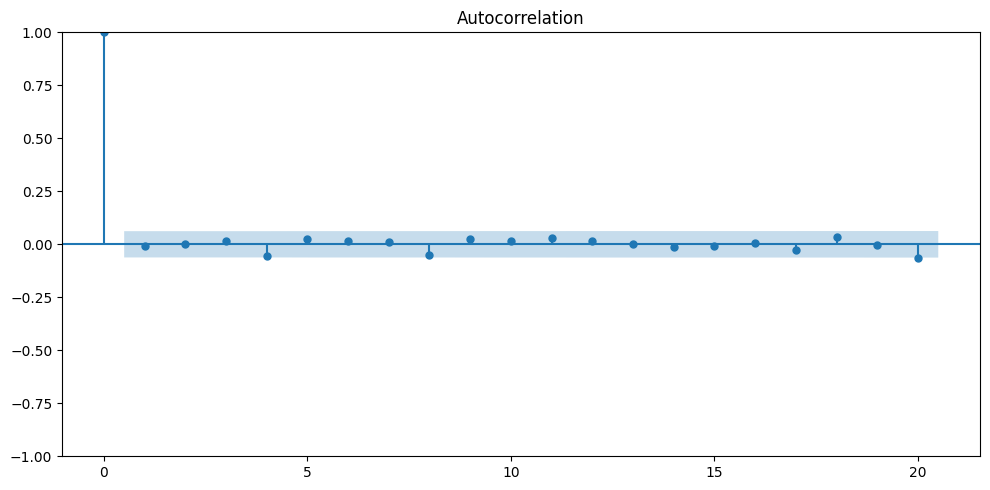

In [ ]:
plot_acf(diff_random_walk, lags=20);

plt.tight_layout()

### Is AMZN a random walk?

In [ ]:
AMZN_ADF_result = adfuller(df['Close'])

print(f'ADF Statistic: {AMZN_ADF_result[0]}')
print(f'p-value: {AMZN_ADF_result[1]}')

ADF Statistic: -1.2571399125314042
p-value: 0.6485457929359854


In [ ]:
diff_close = np.diff(df['Close'], n=1)

In [ ]:
AMZN_diff_ADF_result = adfuller(diff_close)

print(f'ADF Statistic: {AMZN_diff_ADF_result[0]}')
print(f'p-value: {AMZN_diff_ADF_result[1]}')

ADF Statistic: -16.316929753009756
p-value: 3.155381839109975e-29


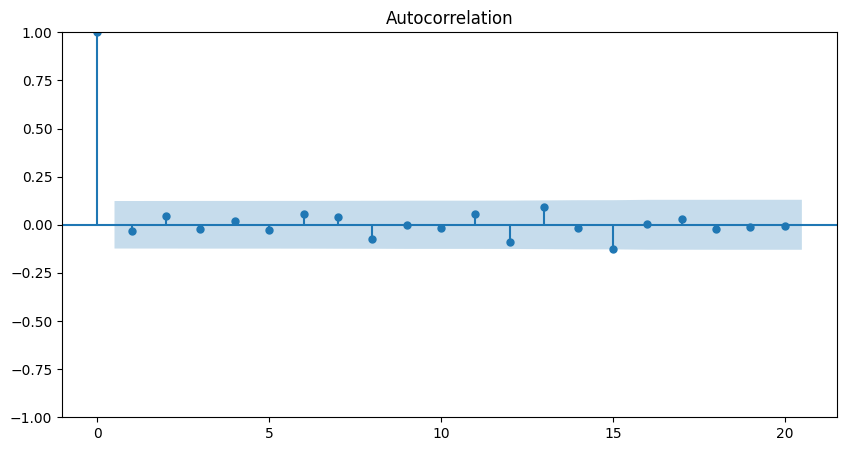

In [ ]:
plot_acf(diff_close, lags=20);

## Forecasting a random walk
### Forecasting on a long horizon

In [ ]:
df = pd.DataFrame({'value': random_walk})

train = df[:800]
test = df[800:]

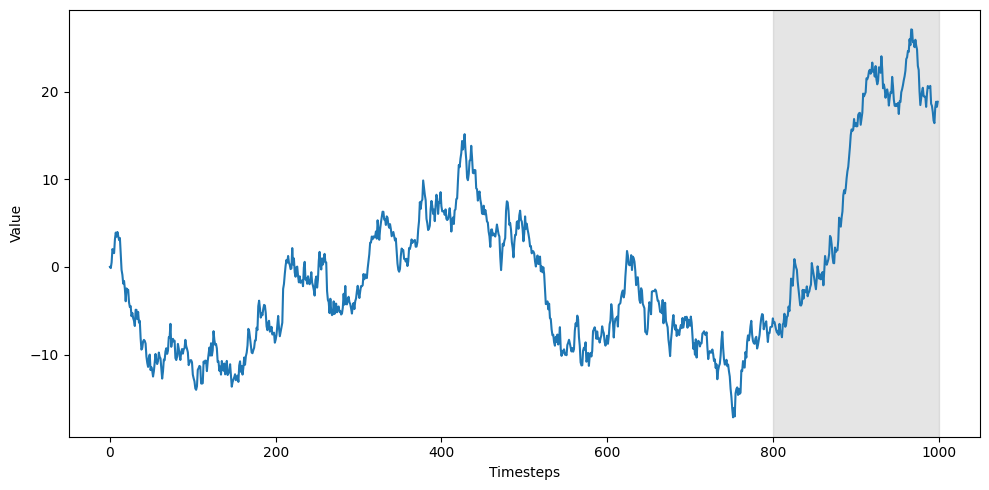

In [ ]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.axvspan(800, 1000, color='#808080', alpha=0.2)

plt.tight_layout()

In [ ]:
mean = np.mean(train.value)

test.loc[:, 'pred_mean'] = mean

test.head()

,value,pred_mean
800,-5.876664,-3.677206
801,-6.392708,-3.677206
802,-6.296588,-3.677206
803,-6.758863,-3.677206
804,-7.193359,-3.677206


In [ ]:
last_value = train.iloc[-1].value

test.loc[:, 'pred_last'] = last_value

test.head()

,value,pred_mean,pred_last
800,-5.876664,-3.677206,-6.814947
801,-6.392708,-3.677206,-6.814947
802,-6.296588,-3.677206,-6.814947
803,-6.758863,-3.677206,-6.814947
804,-7.193359,-3.677206,-6.814947


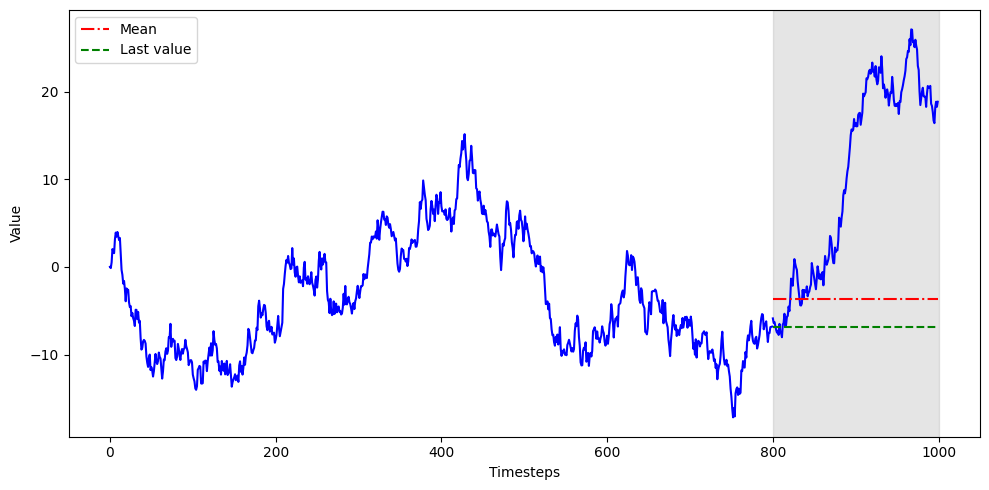

In [ ]:
fig, ax = plt.subplots()

ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')

ax.axvspan(800, 1000, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

In [ ]:
from sklearn.metrics import mean_squared_error

mse_mean = mean_squared_error(test['value'], test['pred_mean'])
mse_last = mean_squared_error(test['value'], test['pred_last'])

print(mse_mean, mse_last)

326.50277395297474 425.1726033055617


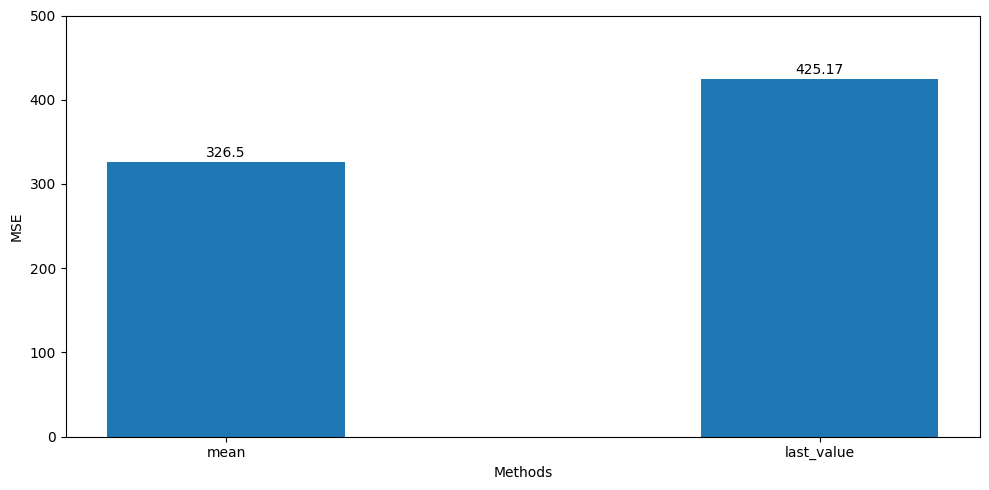

In [ ]:
fig, ax = plt.subplots()

x = ['mean', 'last_value']
y = [mse_mean, mse_last]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MSE')
ax.set_ylim(0, 500)

for index, value in enumerate(y):
    plt.text(x=index, y=value+5, s=str(round(value, 2)), ha='center')

plt.tight_layout()

### Forecasting the next timestep

In [ ]:
df_shift = df.shift(periods=1)

df_shift.head()

,value
0,NaN
1,0.000000
2,-0.138264
3,0.509424
4,2.032454


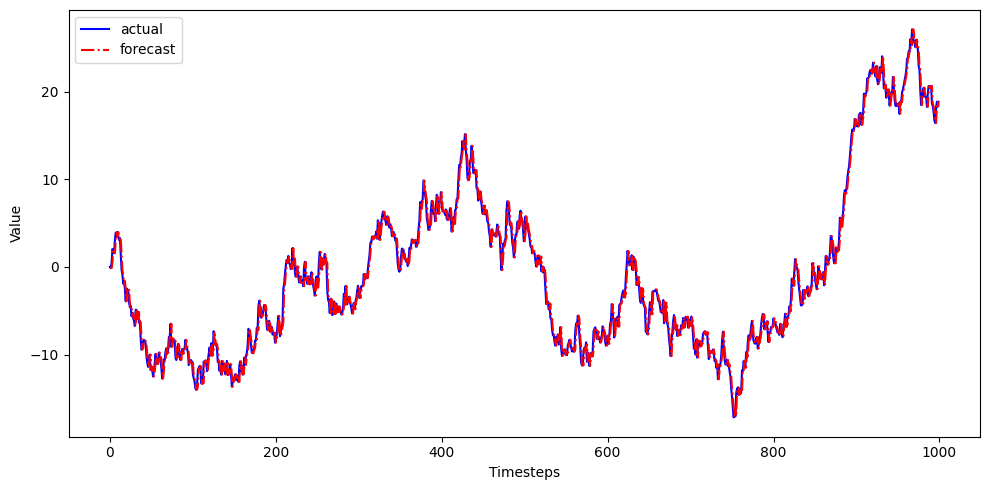

In [ ]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

In [ ]:
mse_one_step = mean_squared_error(test['value'], df_shift[800:])

mse_one_step

0.9256876651440581

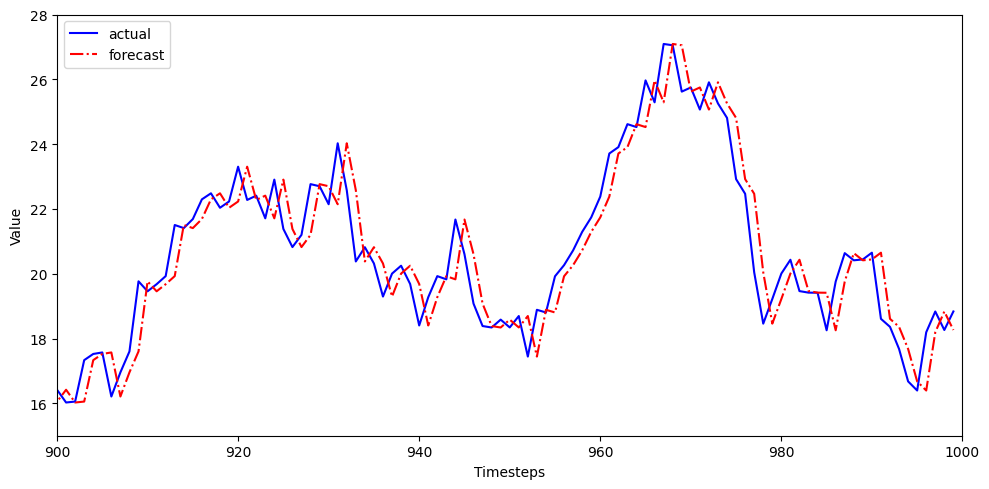

In [ ]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlim(900, 1000)
ax.set_ylim(15, 28)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()